# Import the Libraries

In [ ]:
import numpy as nm
import pandas as pd
import seaborn as seaborn_plot
import matplotlib.pyplot as plt
import scipy.stats as stats
import time

import warnings
warnings.filterwarnings("ignore")

from keras.utils.vis_utils import plot_model
import tensorflow as ts
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Conv2D, MaxPooling2D,Flatten, Dense
from keras.callbacks import EarlyStopping

# Read the Datasets

In [ ]:
x_test = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test/x_test.csv"))
x_train = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train/x_train.csv"))
y_test = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Test/y_test.csv"))
y_train = nm.array(pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Train/y_train.csv"))

# Data Pre-processing

In [ ]:
x_train = x_train.reshape((-1,28,28,1))
x_test = x_test.reshape((-1,28,28,1))
x_train = x_train/255
x_test = x_test/255
print(x_train.shape, x_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


# Plotting the Images

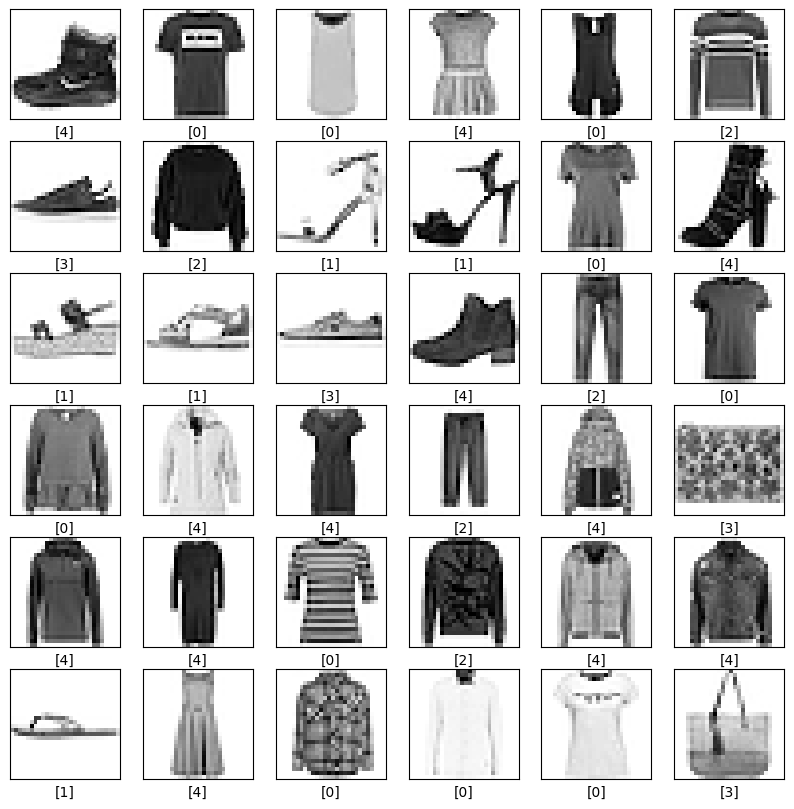

In [ ]:
#From Train Data

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap="Greys")
  plt.xlabel(y_train[i])

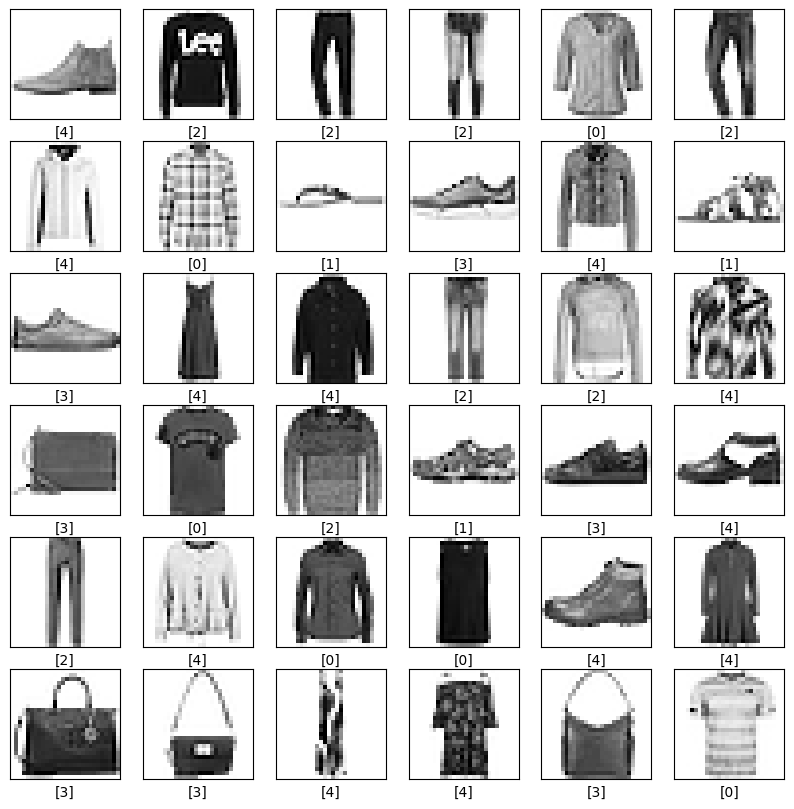

In [ ]:
# From test Data

plt.figure(figsize=(10,10))
for i in range(36):
  plt.subplot(6,6,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_test[i],cmap="Greys")
  plt.xlabel(y_test[i])

After visulazing the X_train and X_test images with respect Y_train and Y_test values. The mystery labels for the dataset are as follows:

0 -> T-shirt/Top and Shirt\
1 -> Sandal\
2 -> Pullover and Trouser\
3 -> Sneaker and Bag\
4 -> Dress, Ankle Boot and Coat

# Creating the Basic CNN network

In [ ]:
model_basic = Sequential()

# Adding convolutional layer with 32, 3x3 filters, stride 1, padding 1x1
model_basic.add(Conv2D(filters= 32, kernel_size = (3,3), activation='relu', strides = 1, padding = 'same', data_format = 'channels_last', input_shape = (28,28,1)))

#Adding max pooling layer 2,2
model_basic.add(MaxPooling2D(pool_size = (2,2)))

# Adding convolutional layer with 32, 3x3 filters, stride 1, padding 1x1
model_basic.add(Conv2D(filters= 32, kernel_size = (3,3), activation='relu', strides = 1, padding = 'same', data_format = 'channels_last'))

# Flatten the output
model_basic.add(Flatten())

# Output layer with 5 Output values
model_basic.add(Dense(128,activation= 'relu'))

# Output layer with 5 Output values
model_basic.add(Dense(5,activation= 'softmax'))

#Summarise the network generated
model_basic.summary()

#Complie the network and adding optimizer : Stochastic Gradient Descent
model_basic.compile(optimizer = 'sgd', loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        9248      
                                                                 
 flatten (Flatten)           (None, 6272)              0         
                                                                 
 dense (Dense)               (None, 128)               802944    
                                                                 
 dense_1 (Dense)             (None, 5)                 645       
                                                        

# Fit the model to Train data

In [ ]:
# Early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
start_time = time.time()
default_model_early = model_basic.fit(x_train, y_train, epochs =100, batch_size = 128, validation_split = 0.2,  callbacks=[early_stopping])
print(f"Default Model Training runtime {time.time() - start_time} seconds")

Epoch 1/100
375/375 [==============================] - 11s 6ms/step - loss: 0.8179 - accuracy: 0.6716 - val_loss: 0.5669 - val_accuracy: 0.7908
Epoch 2/100
375/375 [==============================] - 2s 5ms/step - loss: 0.5179 - accuracy: 0.8036 - val_loss: 0.5773 - val_accuracy: 0.7677
Epoch 3/100
375/375 [==============================] - 2s 4ms/step - loss: 0.4435 - accuracy: 0.8340 - val_loss: 0.4042 - val_accuracy: 0.8519
Epoch 4/100
375/375 [==============================] - 2s 6ms/step - loss: 0.4054 - accuracy: 0.8513 - val_loss: 0.3882 - val_accuracy: 0.8608
Epoch 5/100
375/375 [==============================] - 2s 6ms/step - loss: 0.3711 - accuracy: 0.8655 - val_loss: 0.3598 - val_accuracy: 0.8713
Epoch 6/100
375/375 [==============================] - 2s 4ms/step - loss: 0.3489 - accuracy: 0.8733 - val_loss: 0.3757 - val_accuracy: 0.8590
Epoch 7/100
375/375 [==============================] - 2s 5ms/step - loss: 0.3333 - accuracy: 0.8809 - val_loss: 0.3518 - val_accuracy: 0.873

In [ ]:
start_time = time.time()
loss, accuracy = model_basic.evaluate(x_test, y_test, verbose=0)
print(f"Default Model Testing runtime {time.time() - start_time} seconds")
print(f"Loss = {loss*100}")
print(f"Accuracy = {accuracy*100}")

Default Model Testing runtime 1.2441763877868652 seconds
Loss = 26.95610225200653
Accuracy = 90.42999744415283


In [ ]:
print(default_model_early.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


# Plot the Training Vs Validation Loss and Accuracy Plots

Text(0.5, 1.0, 'Classification Accuracy vs Training Epoch for Default Model')

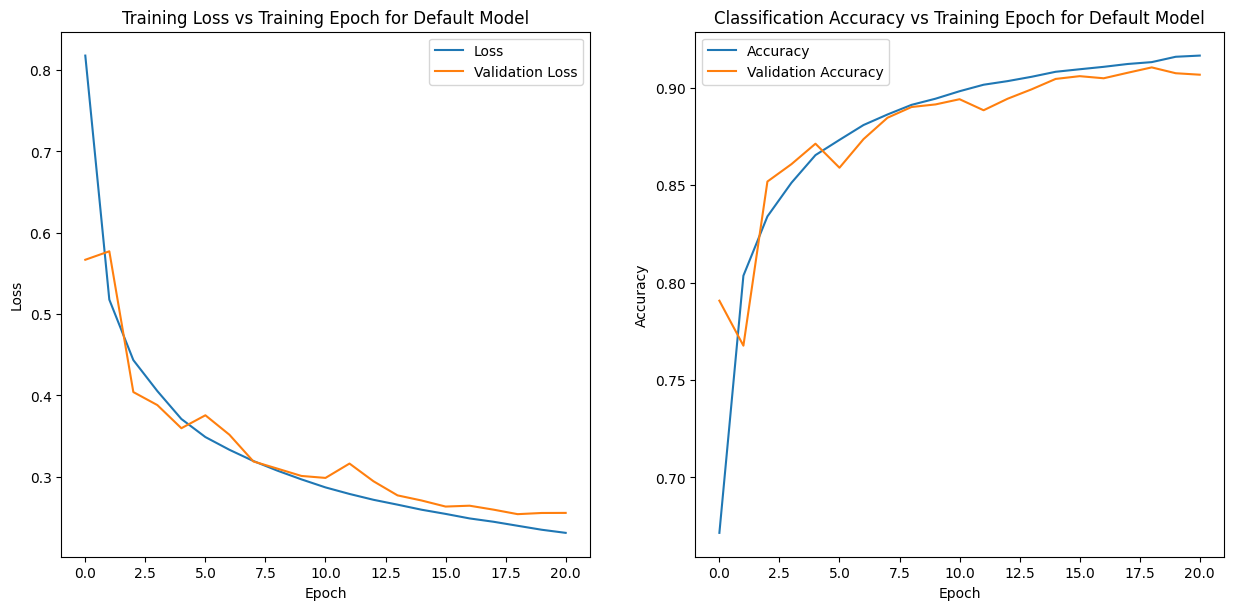

In [ ]:
plt.figure(figsize=(15, 15))

plt.subplot(2, 2, 1)
plt.plot(default_model_early.history['loss'], label='Loss')
plt.plot(default_model_early.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss vs Training Epoch for Default Model')

plt.subplot(2, 2, 2)
plt.plot(default_model_early.history['accuracy'], label='Accuracy')
plt.plot(default_model_early.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Classification Accuracy vs Training Epoch for Default Model')

# Model Summry in a Graphical Manner

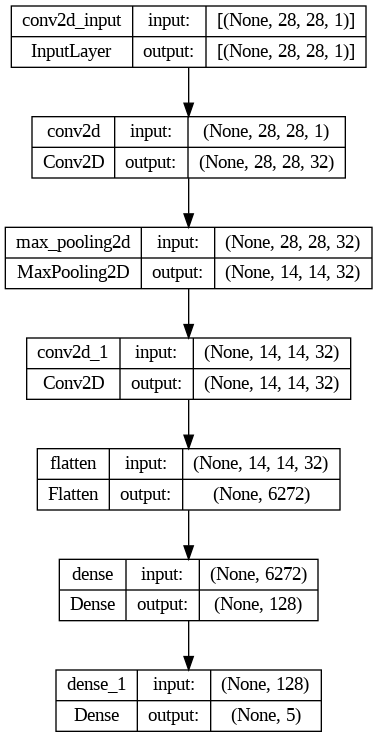

In [ ]:
plot_model(model_basic, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Predcition using test set

In [ ]:
start1_time = time.time()
predictions_one_hot = model_basic.predict([x_test])
print(f"Default Model Testing runtime {time.time() - start1_time} seconds")
pd.DataFrame(predictions_one_hot)
predictions = nm.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

313/313 [==============================] - 1s 2ms/step
Default Model Testing runtime 1.4537019729614258 seconds


,0
0,4
1,2
2,2
3,2
4,0
...,...
9995,4
9996,2
9997,3
9998,2


In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = nm.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(y_test[predicted_label],
                                100*nm.max(predictions_array),
                                y_test[true_label]),
                                color=color)

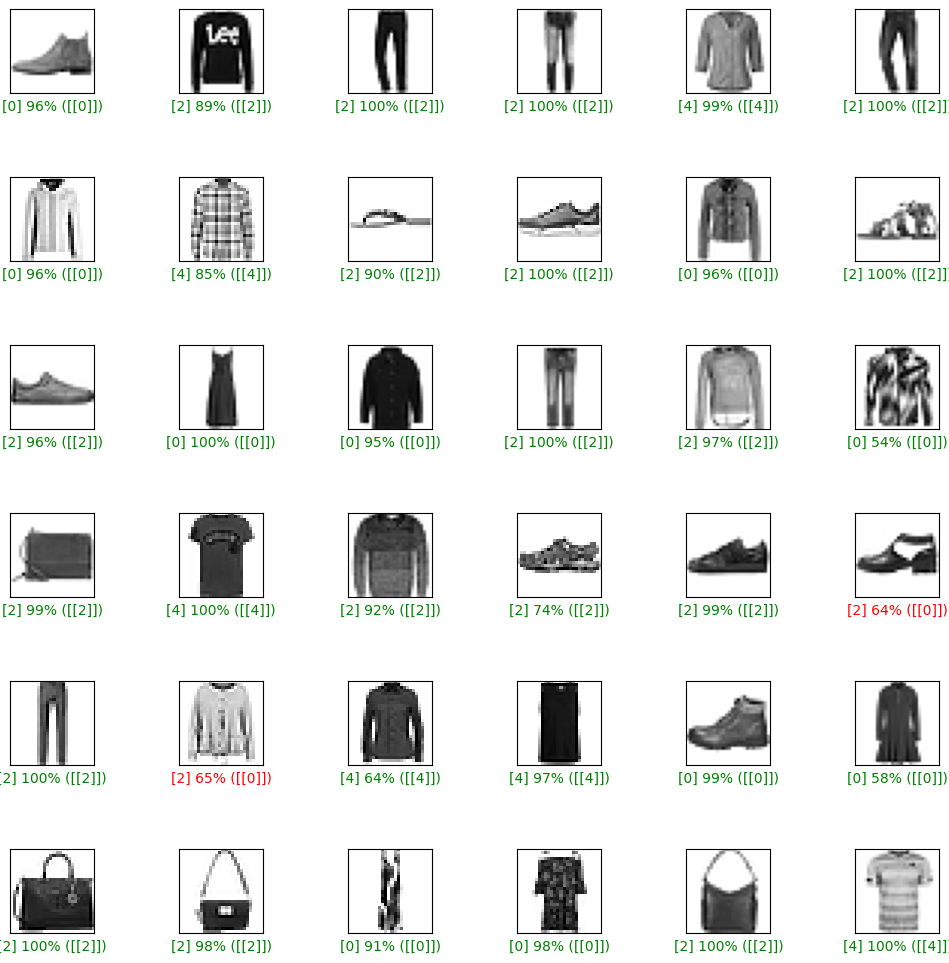

In [ ]:
numbers_to_display = 36
import math
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(12, 12))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_test[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plot_image(plot_index, predictions_one_hot, y_test, x_test)
    #plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=1)
plt.show()